# Criando Nomes 

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
a = nomes_f['nome'] == 'LUANA'

In [4]:
nomes_f[a]

,nome,regiao,freq,rank,sexo
27,LUANA,0,354625,28,F


In [5]:
b = nomes_m['nome'] == 'LUcCA'

In [6]:
nomes_m[b]

,nome,regiao,freq,rank,sexo


In [7]:
nomes = pd.concat([nomes_f,nomes_m])['nome'].to_frame()

In [8]:
nomes.sample(5)

,nome
67,HENRIQUE
110,IVAN
2,FRANCISCA
30,ELIANE
85,HELENA


# Incluindo ID dos alunos

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@dominiodoemail.com.br,severino@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br,iago@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br,sandra@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br


# Criando a tabela Cursos 

In [16]:
!pip3 install html5lib
!pip3 install lxml

In [17]:
import html5lib

In [18]:
s = ['Lógica de Programação', 'Java para Web','C# para Web', 'Ruby on Rails', 'Cursos de Python', 'PHP com MySQL', '.NET para Web', 'Novas integrações com Java', 'TDD com Java','Código limpo com C#', 'Preparatório para certificação Java', 'Hardware básico', 'Persistências com .NET', 'Desenvolvendo jogos', 'Análise de dados','Estatística básica', 'Internet das coisas', 'Programação funcional', 'Boas práticas em Java', 'Orientação objetos com Java']
col=['Nome do curso']

In [19]:
cursos = pd.DataFrame(s, columns= col)

In [20]:
cursos

,Nome do curso
0,Lógica de Programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySQL
6,.NET para Web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [21]:
cursos.columns = ['Nome_do_curso']

In [22]:
cursos['id']= cursos.index + 1
cursos.index = range(cursos.shape[0])

In [23]:
cursos = cursos.set_index('id')

In [24]:
cursos

,Nome_do_curso
id,
1,Lógica de Programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySQL
7,.NET para Web
8,Novas integrações com Java
9,TDD com Java


In [25]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Matriculando os alunos nos cursos 

In [26]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [27]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [28]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

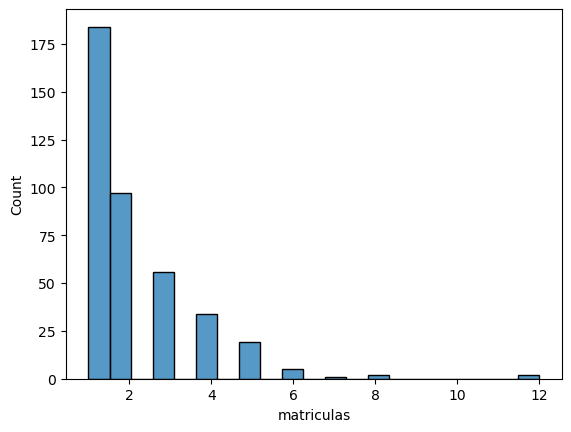

In [30]:
sns.histplot(nomes.matriculas)

In [31]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

# Selecionando cursos 

In [32]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [33]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [34]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,24,Lógica de Programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySQL
7,56,.NET para Web
8,42,Novas integrações com Java
9,60,TDD com Java


In [35]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
37,EDSON,123,@servicodoemail.com,edson@servicodoemail.com,1
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8
192,ZILDA,237,@servicodoemail.com,zilda@servicodoemail.com,1


In [36]:
cursos.head()

,Nome_do_curso
id,
1,Lógica de Programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [37]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [38]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [39]:
matriculas_por_curso

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,24,Lógica de Programação
2,52,Java para Web
3,54,C# para Web
4,51,Ruby on Rails
5,3,Cursos de Python
6,32,PHP com MySQL
7,56,.NET para Web
8,42,Novas integrações com Java
9,60,TDD com Java


# Saída em diferentes formatos 

In [40]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [41]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,Nome_do_curso
0,24,Lógica de Programação
1,52,Java para Web
2,54,C# para Web
3,51,Ruby on Rails
4,3,Cursos de Python
5,32,PHP com MySQL
6,56,.NET para Web
7,42,Novas integrações com Java
8,60,TDD com Java
9,68,Código limpo com C#


In [42]:
matriculas_json = matriculas_por_curso.to_json()

In [43]:
matriculas_json

'{"quantidade_de_alunos":{"1":24,"2":52,"3":54,"4":51,"5":3,"6":32,"7":56,"8":42,"9":60,"10":68,"11":78,"12":21,"13":21,"14":18,"15":57,"16":24,"17":71,"18":60,"19":6,"20":56},"Nome_do_curso":{"1":"L\\u00f3gica de Programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySQL","7":".NET para Web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancias com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [44]:
matriculas_html = matriculas_por_curso.to_html()

In [45]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de Programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySQL</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para Web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>42</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>60</td>
 

In [46]:
matriculas_por_curso.to_html('matriculas_por_curso.html')

# Criando o banco SQL

In [47]:
!pip install sqlalchemy

In [48]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [49]:
engine = create_engine('sqlite:///:memory:')

In [50]:
engine

Engine(sqlite:///:memory:)

In [51]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [52]:
inspector = inspect(engine)

In [53]:
print(inspector.get_table_names())

['matriculas']


# Buscando do banco SQL

In [54]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [55]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,Nome_do_curso
0,5,3,Cursos de Python
1,14,18,Desenvolvendo jogos
2,19,6,Boas práticas em Java


In [56]:
pd.read_sql_table('matriculas',engine,columns = ['Nome_do_curso','quantidade_de_alunos'])

,Nome_do_curso,quantidade_de_alunos
0,Lógica de Programação,24
1,Java para Web,52
2,C# para Web,54
3,Ruby on Rails,51
4,Cursos de Python,3
5,PHP com MySQL,32
6,.NET para Web,56
7,Novas integrações com Java,42
8,TDD com Java,60
9,Código limpo com C#,68


In [57]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns = ['Nome_do_curso','quantidade_de_alunos'])

In [58]:
muitas_matriculas

,Nome_do_curso,quantidade_de_alunos
0,Lógica de Programação,24
1,Java para Web,52
2,C# para Web,54
3,Ruby on Rails,51
4,Cursos de Python,3
5,PHP com MySQL,32
6,.NET para Web,56
7,Novas integrações com Java,42
8,TDD com Java,60
9,Código limpo com C#,68


In [59]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [60]:
muitas_matriculas

,Nome_do_curso,quantidade_de_alunos
10,Preparatório para certificação Java,78
16,Internet das coisas,71


# Escrevendo no banco

In [61]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

2

In [62]:
inspector = inspect(engine)

In [63]:
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [64]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
101,296,16
122,27,16
173,246,16
201,96,16
261,285,16
288,135,16
384,353,16
441,67,16
470,311,16
498,336,16


In [67]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
296,DANIELA
27,RAFAELA
246,LAURA
96,CAROLINA
285,VANIA
135,MIRIAN
353,JENIFER
67,PEDRO
311,ANDRE


In [69]:
nome_curso = cursos.loc[id_curso]
nome_curso

Nome_do_curso    Estatística básica
Name: 16, dtype: object

In [70]:
nome_curso = nome_curso.Nome_do_curso 
nome_curso

'Estatística básica'

In [71]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [72]:
proxima_turma.columns = ['Alunos do curso de {}'.format(nome_curso)]

In [73]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
296,DANIELA
27,RAFAELA
246,LAURA
96,CAROLINA
285,VANIA
135,MIRIAN
353,JENIFER
67,PEDRO
311,ANDRE


# Excel

In [74]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [75]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,DANIELA
1,RAFAELA
2,LAURA
3,CAROLINA
4,VANIA
5,MIRIAN
6,JENIFER
7,PEDRO
8,ANDRE
9,RICARDO
